# Introductory applied machine learning (INFR10069)
# Assignment 4: Unsupervised Learning Part A (KMeans Clustering)

<div align="right"><font color="blue" size="5">Your Score was 55.5 out of a total of 66.0, or 84.1%</font></div>

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. <font color='red'>We have split Assignment 4 into two parts to make it easier for you to work on them separately and for the markers to give you feedback. This is part A of Assignment 4 and deals with the News-Group Dataset - Part B deals with the MNIST dataset. Both Assignments together are still worth 50% of CourseWork 2. **Remember to submit both notebooks (you can submit them separately).**</font>

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation: **in questions where this is specified, you will be penalised if you go over.**

1. Make sure to distinguish between **attributes** (columns of the data) and **features** (which typically refers only to the independent variables, i.e. excluding the target variables).

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you must NOT borrow actual text or code from others. We ask that you provide a list of the people who you've had discussions with (if any). Please refer to the [Academic Misconduct](http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct) page for what consistutes a breach of the above.

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 15/11/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file(s) again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

**N.B.**: This Assignment requires submitting **two files (electronically as described below)**:
 1. This Jupyter Notebook for Part A, *and*
 1. The Jupyter Notebook for Part B
 
All submissions happen electronically. To submit:
1. Fill out this notebook (as well as Part B), making sure to:
   1. save it with **all code/text and visualisations**: markers are NOT expected to run any cells,
   1. keep the name of the file **UNCHANGED**, *and*
   1. **keep the same structure**: retain the questions, **DO NOT** delete any cells and **avoid** adding unnecessary cells unless absolutely necessary, as this makes the job harder for the markers.
   
1. Submit it using the `submit` functionality. To do this, you must be on a DICE environment. Open a Terminal, and:
   1. **On-Campus Students**: navigate to the location of this notebook and execute the following command:
   
      ```submit iaml cw2 04_A_KMeans.ipynb 04_B_PCA.ipynb```
      
   1. **Distance Learners:** These instructions also apply to those students who work on their own computer. First you need to copy your work onto DICE (so that you can use the `submit` command). For this, you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example. Replace entries in `[square brackets]` with your specific details: i.e. if your student number is for example s1234567, then `[YOUR USERNAME]` becomes `s1234567`.
   
    ```
    scp -r [FULL PATH TO 04_A_KMeans.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:04_A_KMeans.ipynb
    scp -r [FULL PATH TO 04_B_PCA.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:04_B_PCA.ipynb
    ssh [YOUR USERNAME]@student.ssh.inf.ed.ac.uk
    ssh student.login
    submit iaml cw2 04_A_KMeans.ipynb 04_B_PCA.ipynb
    ```
    
   What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You should receive an automatic email confirmation after submission.
  

### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%. Both Part A (this notebook) and Part B are each worth 50% of the Total Mark for Assignment 4.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Use the cell below to include any imports you deem necessary.

In [22]:
%matplotlib inline
%pylab inline

# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# For Getting the Data
from sklearn.datasets import fetch_20newsgroups, load_digits
from sklearn.feature_extraction.text import TfidfVectorizer

# System functionality
import sys
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton

# Your Code goes here:
import os
import numpy as np 
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from utils import plotter
from sklearn.decomposition import PCA

Populating the interactive namespace from numpy and matplotlib


## Description of the dataset

In this part of the assignment we will cluster the observations in the 20 Newsgroups dataset using the k-means algorithm. Each row of the dataset represents a document with bag of words features. If we were not given the labels for each document (i.e. the newsgroup it came from), clustering could allow us to infer which documents should have the same label. Observing common words within each cluster may allow us to give meaning to these inferred labels too.

### Description of the Data

This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related.

**In contrast to Assignment 1**, we have opted to use tf-idf weights ([term frequency - inverse document frequency](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)) for each word instead of the frequency counts (which is why we will be downloading it anew). These weights represent the importance of a word to a document with respect to a collection of documents. The importance increases proportionally to the number of times a word appears in the document and decreases proportionally to the number of times the word appears in the whole corpus. 

Additionally we preprocess the data to include the most frequent 1000 words that appear in more than two documents, less than half of all documents, and that are not [stop words](https://en.wikipedia.org/wiki/Stop_words). We have provided the code for this preprocessing for you.

## 1. Exploration of the dataset

Instead of providing the data as a dataset, we are going to import the data from the sklearn library. Make sure you have an active internet connection and run the cell below to import the data. It would be a good idea to understand the code but it's not strictly necessary (see the [sklearn documentation](http://scikit-learn.org/0.19/datasets/index.html#the-20-newsgroups-text-dataset)).

**Do not change any of the code in this cell.**

*This may take a wee while as it needs to download the dataset and preprocess it.*

In [3]:
# Load the Data with only the required categories
cats = ['alt.atheism', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 
        'rec.sport.baseball', 'rec.sport.hockey']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats, 
                                      remove=('headers', 'footers', 'quotes'), data_home='./datasets')
# Transform Data to TF-IDF and store in X/y
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000, min_df=2, stop_words='english', 
                             token_pattern='(?u)\\b[A-z]{2,}\\b')
X = pd.DataFrame(vectorizer.fit_transform(newsgroups_train.data).todense(), 
                 columns=vectorizer.get_feature_names())
y = pd.Series(np.array(cats)[newsgroups_train.target])

### ========== Question 1.1 --- [10 marks] ==========

As usual we start with an initial inspection of the data. 

&nbsp;&nbsp;**(a)** [Code] Using suitable pandas/numpy methods, summarise the key properties of the data (variables `X` and `y`). This should be no more than a few lines of code.<br>
&nbsp;&nbsp;**(b)** [Text] Comment on your observations from ***(a)*** (dimensionality, data ranges, anything out of the ordinary). Be sure to indicate what `X` and `y` are (data type and purpose). (<5 sentences)<br>
&nbsp;&nbsp;**(c)** [Text] Why do you think it is useful to consider TF-IDF weights as opposed to just the frequency of times a word appears in a document as a feature? (1 or 2 sentences)

<div align="right"><font color="blue" size="4">10.0/10.0</font></div>

In [4]:
# (a) # Your Code goes here:
print('DATAFRAME X PROPERTIES: ')
display(X.describe()) #display summary statistics for the data
display(X.head(3))  #display the first 3 documents (rows) of the dataset X
display(X.info())  #display basic information about the dataset X (dimensionality/shape, data types)
print(X.shape)  #print out the dimensions of X.
print()
print('LABEL VECTOR(pd Series) Y PROPERTIES:')
display(y.describe()) #display summary statistics for the data of the true labels vector y
display(np.unique(y))  #display the unique (no duplicates) column names of the true labels vector y
print(y.shape) #print out the dimensions of y.
display(type(y))

DATAFRAME X PROPERTIES: 


,abc,ability,able,ac,accept,access,according,acquired,actually,adaptec,...,written,wrong,yankees,yeah,year,years,yes,york,young,zone
count,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,...,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000
mean,0.002436,0.002149,0.006709,0.001454,0.002286,0.003953,0.003115,0.000921,0.008366,0.001816,...,0.002612,0.006811,0.002470,0.003564,0.016934,0.008797,0.006381,0.002772,0.003288,0.001626
std,0.030224,0.020739,0.034631,0.023100,0.021634,0.030111,0.026958,0.016275,0.043921,0.026026,...,0.026988,0.039172,0.032786,0.031238,0.061181,0.039346,0.037319,0.025381,0.030929,0.022175
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.723914,0.420916,0.431380,0.519765,0.443354,0.663808,0.572124,0.413233,1.000000,0.578282,...,0.723081,0.568146,0.878185,0.693531,0.650649,0.455493,0.646447,0.572455,0.703771,0.605576


,abc,ability,able,ac,accept,access,according,acquired,actually,adaptec,...,written,wrong,yankees,yeah,year,years,yes,york,young,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Columns: 1000 entries, abc to zone
dtypes: float64(1000)
memory usage: 21.7 MB


None

(2845, 1000)

LABEL VECTOR(pd Series) Y PROPERTIES:


count                 2845
unique                   5
top       rec.sport.hockey
freq                   600
dtype: object

array(['alt.atheism', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'rec.sport.baseball', 'rec.sport.hockey'], dtype=object)

(2845,)


pandas.core.series.Series

<div align="right"><font color="blue" size="4">3.0</font></div>

(b) ***Your answer goes here:***
`X` is a dataframe containing the document and feature data, containing `2845` **rows** , each row representing *one document*, and `1000` **columns/features** , each representing *a word that might appear or not* in a document.
Each (row,column) pair/cell contains the **tf-idf weight** for the particular word (feature) in the specific document(row).
Each cell has a `float64` data type, which is reasonable as we must use floating point numbers for the tf-idf weight.
The data range is from `0.0` to `1.0` and the *majority* of values/weights of word occurences in documents is `0.0`, which is normal for such bag of words models with such huge amounts of documents. 
<br>**Peculiar observation:** The majority of the `max` values in the dataframe `X` summary statistics are ***extremely large*** (>mean +- 3 stds) and we have to explore further at a later stage to see if they are **outliers**

`y` is a *Pandas Series* containing target *class labels* for documents (rows/data points) in X, with the top class being `rec.sport.hockey` containing 600 ones(documents classified as that class) as we can see from the summary `describe` method. It contains the true class that each document belongs to, in order to compare it with predictions on the dataset (X) 

<div align="right"><font color="blue" size="4">5.0</font></div>

(c) ***Your answer goes here:***

It is more useful to use *tf-idf* because it *also* ***weighs***  words according in proportion to how much they occur in **the whole dataset/corpus (all documents)- this is inverse document frequency**, *along* with their term frequency in *one specific document*. 
Hence, the tf-idf outlines the *actual importance* of the word, giving a lower value to a word that occurs often in all documents of the dataset (for example "`the`") and a higher value to a more *rare* word that occurred frequently in *that specific  document, but not in many documents in the whole dataset*.

<div align="right"><font color="blue" size="4">2.0</font></div>

## 2. Unsupervised Learning

### ========== Question 2.1 --- [6 marks] ==========

We will now use [K-Means](http://scikit-learn.org/0.19/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) clustering as a means of unsupervised learning of the document classes. Familiarise yourself with the implementation and then answer the following questions.

&nbsp;&nbsp;**(a)** [Text] The KMeans algorithm is non-deterministic. Explain what is meant by this, why this is the case, and how the final model is selected (3 sentences).<br>
&nbsp;&nbsp;**(b)** [Text] One of the parameters we need to specify when using k-means is the number of clusters. What is a reasonable number for this problem and why? *Hint: Look at the `y` values, which are in a Pandas `Series`*.<br>
&nbsp;&nbsp;**(b)** [Code] Create and fit a K-Means model to the training data `X` with your specified number of clusters. For reproducability, set `random_state=1000` -- keep other arguments at default values. Keep track of the k-means object created.

<div align="right"><font color="blue" size="4">5.0/6.0</font></div>

(a) ***Your answer goes here:***
Non-deterministic algorithms produce can produce multiple *different* results when ran multiple times with *exactly the same* parameters/settings.
K-Means is non deterministic in the sense that when we run the algorithm multiple times , we will get different results in each repetition, because the algorithm will *start/initialise* the **cluters** (the initial *centres*) to different points every time.
The final model is selected at the point when the *cluster centers* ***converge*** (remain stable/the same) after an iteration.

<div align="right"><font color="blue" size="4">2.0</font></div>

(b) ***Your answer goes here:***
Looking at the *unique* `y` values above, we see that there are 5 different *unique* classes, hence a sensible number of clusters is 5 (one cluster for each class)

<div align="right"><font color="blue" size="4">2.0</font></div>

In [5]:
#(c) # Your Code goes here:
kmeans = KMeans(n_clusters=5,random_state=1000)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1000, tol=0.0001, verbose=0)

<div align="right"><font color="blue" size="4">1.0</font></div>

### ========== Question 2.2 --- [6 marks] ==========

<div align="right"><font color="blue" size="4">3.5/6.0</font></div>

We will now evaluate the quality of this fit, primarily through the Adjusted Rand Index (ARI) of the model.

&nbsp;&nbsp;**(a)** [Text] By referring to the [sklearn documentation](http://scikit-learn.org/0.19/modules/clustering.html), describe what the ARI (`adjusted_rand_score`) measures about the quality of the fit. What is a disadvantage of this measure for evaluating clustering performance? (2-3 sentences) <br>
&nbsp;&nbsp;**(b)** [Code] Compute (and display) the Adjusted Rand Index of the fitted model.<br>
&nbsp;&nbsp;**(c)** [Text] Comment (1 or 2 sentences) on the quality of the fit as expressed by this measure.<br>

(a) ***Your answer goes here:***
The ARI(Adjusted Rand Index) is an adjusted form of the Rand Index, which is a **similarity measure** between different clusterings.
It is *adjusted* using the equation
`ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)` and it *ranges* from `-1.0` to `1.0`, with values near 0 meaning *random labelling* (clustering) of data and values near 1 indicating that the *predicted labeling (clustering)* and *true labels (`y`)* are a *perfect match* (ignoring *permutations* as it is a symmetric measure). 
It is calculated by taking *pairwise components* of **all** *samples along with their counts (sample-count pair)*, which are either in the *same* or in *different* clusters, for the ***predicted (k-means)*** and ***true (true label `y` counts)*** clusterings. 

**Disadvantage:**  When there are ***similar clases*** in our dataset (e.g. `comp.sys.ibm.pc.hardware` and `comp.sys.mac.hardware` in our dataset) , *different data points* belonging to *one* of two classes may be allocated between **any** of the two clusters for those two classes, resulting in a worse/lower ARI score.

<div align="right"><font color="blue" size="4">2.0</font></div>

In [6]:
#(b) # Your Code goes here:
ari=adjusted_rand_score(labels_true=y, labels_pred=kmeans.labels_)
print('ARI=  ', round(ari,4))

ARI=   0.2262


<div align="right"><font color="blue" size="4">0.5</font></div>

(c) ***Your answer goes here:***
We have a low ARI result (near zero value), meaning that the quality of the fit(clustering) is *near random* when compared to the expected *true clusters/classes(`y` labels)*. This suggests that there are *similar classes* (as we already know from Assignment 1), as ARI didn't consider permutations between those clusters when calculating similarity with the true labels.

<div align="right"><font color="blue" size="4">1.0</font></div>

### ========== Question 2.3 --- [12 marks] ==========
<a id='question_2_3'></a>
Let us explore the quality of the fit further. We will visualise bar-charts of the fit.

&nbsp;&nbsp;**(a)** [Code] Create a bar-chart of the number of data-points with a particular class assigned to each cluster centre. You should be able to do this in one plot using seaborn functionality. Make sure to distinguish the cluster-centres (using for example grid-lines), and label the plot appropriately. As part of the cluster labels, include the total number of data-points assigned to that cluster. *Hint: it might be useful to specify the image width using `pylab.rcParams['figure.figsize'] = (width, height)` to make things clearer.*<br>
&nbsp;&nbsp;**(b)** [Text] Comment (3 to 4 sentences) on the distribution of datapoints to cluster centres, and how this relates to the ARI measure above.


<div align="right"><font color="blue" size="4">11.0/12.0</font></div>

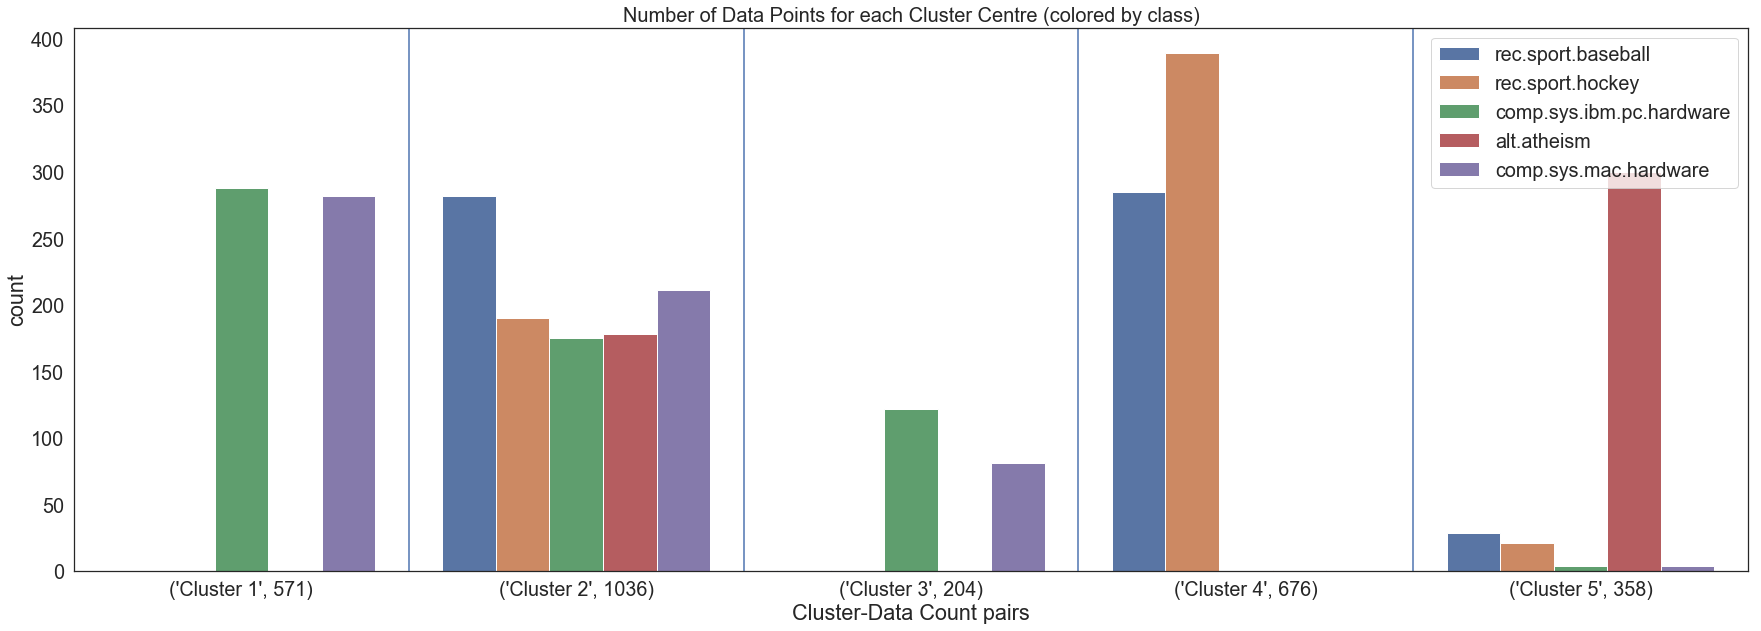

In [7]:
#(a) # Your Code goes here:
plt.rcParams['figure.figsize']= (30,10)

sns.set(style='white',font_scale = 1.8)
ax=sns.countplot(x=kmeans.labels_,hue=y)
plt.title('Number of Data Points for each Cluster Centre (colored by class)',fontsize=20)
counts=pd.value_counts(kmeans.labels_) #populate the data counts for each cluster
counts_sorted=counts.sort_index()  #sort the counts by increasing cluster index
label_counts=zip(['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5'],counts_sorted) #include data counts with each cluster label

ax.set(xticklabels=label_counts,xlabel='Cluster-Data Count pairs')#set the labels of x-axis as the cluster-data count pairs

#used manually drawn vertical lines instead of gridlines as they were stronger to separate the clusters in the plot.
plt.axvline(x=0.5)
plt.axvline(x=1.5)
plt.axvline(x=2.5)
plt.axvline(x=3.5)

print()

<div align="right"><font color="blue" size="4">6.0</font></div>

(b) ***Your answer goes here:***  
<br>The distribution of the *data* among *classes* is good (we have some bars for each class), but the distibution among the **clusters** is well worse than what we need. The perfect *cluster distribution* would be for *each cluster* to contain **all data points for *one* class only**.   
<br>*Cluster 2* seemed to have the by far the most datapoints (`1036`), which is large compared to the rest of the clusters (the next majority cluster, *Cluster 4*, has `676`), but not necessarily good as it contains data from *all classes* which makes it a bad cluster.   
<br>We also observe that **similar classes appear together in clusters**, for example `rec.sport.baseball` and `rec.sport.hockey` appear with high count together in *Cluster 4* and with low count in *Cluster 5* (apart from Cluster 2 which simply, poorly contained everything).<br>This holds also for `comp.sys.ibm.pc.hardware` and `comp.sys.mac.hardware`, appearing **alone** in *Cluster 1* with almost *equal counts* and **alone again** in *Cluster 3*. This indicates that Kmeans is prone to clustering similar classes together, as explained in my answer for ***2.2.a***.   
<br>Another observation is that `alt.atheism` (apart from cluster 2 which contains everything) *only* appears in Cluster 5, which shows that kmeans clustered this class better than other classes (especially the classes which were *similar*.
This kmeans clustering is not good enough for this data as it is not well distributed around cluster centres, **hence the bad ARI**.

<div align="right"><font color="blue" size="4">5.0</font></div>

### ========== Question 2.4 --- (LEVEL 11) --- [11 marks] ==========

Another way to quantify the quality of the fit is to use the Aggregate Intra-Cluster Distance (this is known as the `inertia` within SKLearn).

&nbsp;&nbsp;**(a)** [Text] Again by referring to the [sklearn documentation](http://scikit-learn.org/0.19/modules/clustering.html), describe what this measure reports. Indicate why it may be less straightforward at judging the quality of the clustering than the ARI. (2 to 3 sentences). <br>
&nbsp;&nbsp;**(b)** [Code] Report the Inertia of the fitted model as well as the mean distance between each data-point and the global mean. Compute also a distance matrix such that the entry with index (i,j) shows the distance between centre i and j.<br>
&nbsp;&nbsp;**(c)** [Text] Using the above values, comment on what the Inertia score tells us about the quality of the fit, as well as anything else you can say about the clusters. (2 to 3 sentences)

(a) ***Your answer goes here:***

In [7]:
# (b) # Your Code goes here:

(c) ***Your answer goes here:***

### ========== Question 2.5 --- [16 marks] ==========

We will now investigate using [PCA](http://scikit-learn.org/0.19/modules/generated/sklearn.decomposition.PCA.html) dimensionality reduction to try and improve the quality of the fit.

&nbsp;&nbsp;**(a)** [Text] Give one reason why PCA **might** be preferrable in certain cases in reducing dimensionality over just picking a subset of the features.<br>
&nbsp;&nbsp;**(b)** [Code] Pick 10 values in the range [1, ... 1000] inclusive, representing feature-space dimensionality `n`. Use a log-scale to span this range efficiently. For each of these values, reduce the dimensionality of `X` to the respective size (i.e. PCA with `n` components), and then fit a 5-centre KMeans classifier, storing the `adjusted_rand_score` for each dimensionality. *N.B: Set the `random_state=1000` for both PCA and K-Means objects to ensure reproducability.*<br>
&nbsp;&nbsp;**(c)** [Code] Plot the the `adjusted_rand_score` against the number of principal components. **Scale** the axes appropriately to visualise the results, and label the plot.<br>
&nbsp;&nbsp;**(d)** [Text] Comment on the effect dimensionality reduction had on the K-Means clustering and what could give rise to this (2 - 3 sentences).<br>
&nbsp;&nbsp;**(e)** [Code] Fit a 5-cluster K-Means object to the data with the dimensionality that produced the best ARI. In a similar manner to [Question 2.3](#question_2_3), plot a bar-chart of the number of data-points from each class assigned to each cluster. *N.B: Remember to set `random_state=1000` for both PCA and K-Means objects, and label all your diagrams*.<br>
&nbsp;&nbsp;**(f)** [Text] Compare the clustering distribution in **(e)** and in [Question 2.3 **(a)**](#question_2_3). *Hint: comment briefly (1 to 2 sentences) on the distribution of classes*.

<div align="right"><font color="blue" size="4">16.0/16.0</font></div>

(a) ***Your answer goes here:***
<br>Reason to use PCA over subset of features:
-  When all (or most) features of the data are *equally important* to contribute to the pattern and distribution of the data, we **don't want to remove any features** as this may negatively impact the fit and hence the model *fitted to that data* ,used to cluster or predict the class of data in general. 

PCA reduces the dimensionality of the data *without* removing *any* data or features from the dataset 
<br>(it just projects all the data into the hyperplane of some lower dimension on which the data can all be included (n principal components-highest variance on data with the property of being orthogonal to the rest of Principal Components).  
<br>If picking a subset of the features, we might **lose** important features which define strong relations leading to correct predictions on clustering/classification etc.
N.B.: In other cases where there are **redundant** features, we might choose the latter to improve.

<div align="right"><font color="blue" size="4">1.0</font></div>

In [8]:
#(b) # Your Code goes here:
aris = np.ndarray(10)    #  Create array for ARI scores of the 10 different dimensions
n_range=np.logspace(start=0,stop=3,num=10,base=10,dtype='int64') #used logspace with 10 int samples between 1(1e0) and 1000(1e3)
i=0
for n_i in n_range :
    #creating a temp PCA object, fitting and transforming X
    pca_temp=PCA(n_components = n_i,random_state=1000)
    pca_temp.fit(X)
    X_pca =pca_temp.transform(X)
    
    #creating a temp KMeans object, fitting with the transformed data for that PCA n_i and populating y_pred with the labels 
    kmeans_pca = KMeans(n_clusters=5, random_state=1000)  
    kmeans_pca.fit(X_pca)
    y_pred = kmeans_pca.labels_
    
    #calculating the ari for that n_i Kmeans labels compared to the true labels and populating our aris array
    ari_temp = adjusted_rand_score(labels_true=y, labels_pred=y_pred)
    aris[i]=ari_temp
    
    #printing the results for each iteration
    print(n_i,'-Dimensional data (PCA reduced)')
    print('ARI using KMeans for this dimension:  ',round(aris[i],3))
    print()
    i=i+1
    


1 -Dimensional data (PCA reduced)
ARI using KMeans for this dimension:   0.211

2 -Dimensional data (PCA reduced)
ARI using KMeans for this dimension:   0.269

4 -Dimensional data (PCA reduced)
ARI using KMeans for this dimension:   0.234

10 -Dimensional data (PCA reduced)
ARI using KMeans for this dimension:   0.22

21 -Dimensional data (PCA reduced)
ARI using KMeans for this dimension:   0.205

46 -Dimensional data (PCA reduced)
ARI using KMeans for this dimension:   0.213

100 -Dimensional data (PCA reduced)
ARI using KMeans for this dimension:   0.212

215 -Dimensional data (PCA reduced)
ARI using KMeans for this dimension:   0.215

464 -Dimensional data (PCA reduced)
ARI using KMeans for this dimension:   0.209

1000 -Dimensional data (PCA reduced)
ARI using KMeans for this dimension:   0.223



<div align="right"><font color="blue" size="4">3.0</font></div>

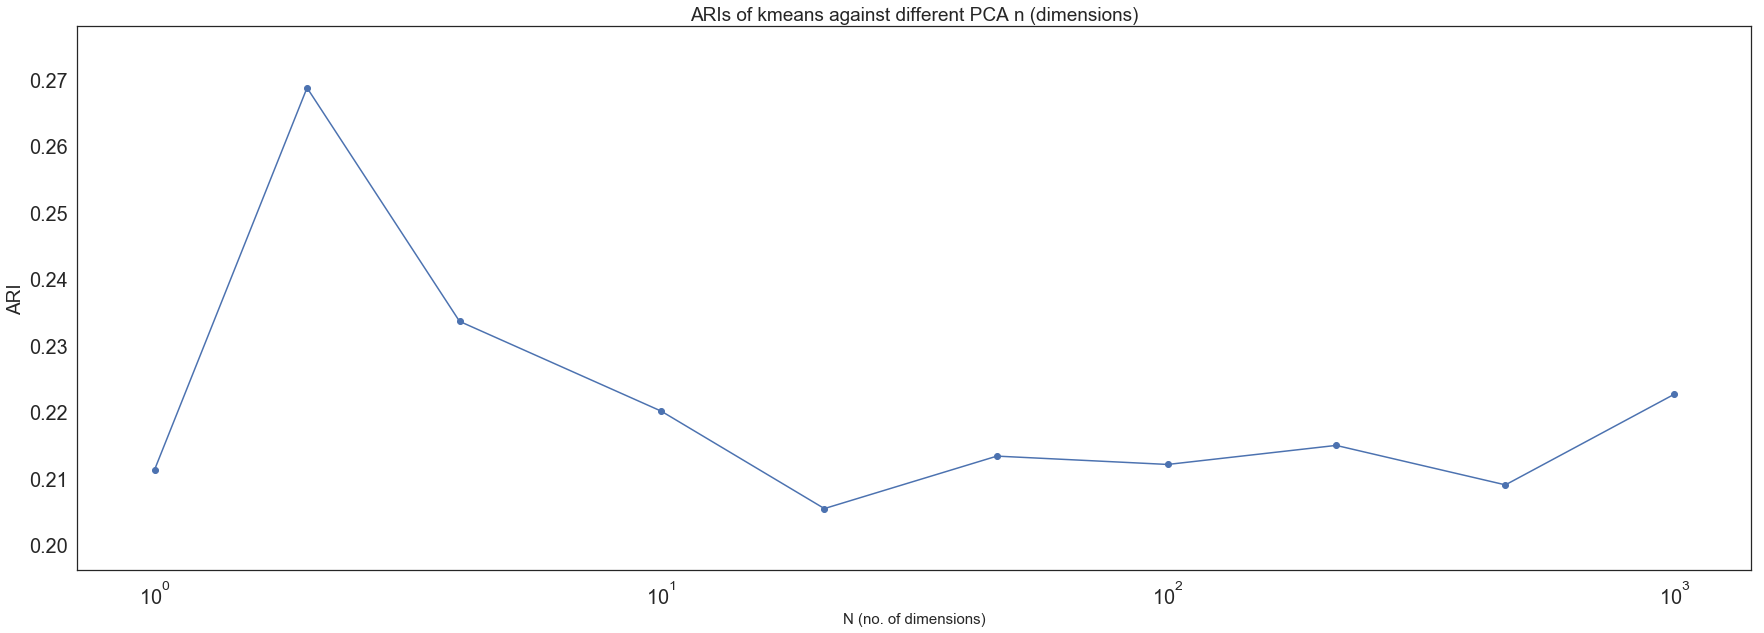

In [9]:
#(c) # Your Code goes here:
plt.figure()
plt.xscale('log') #scaling accordingly the x-axis for our log range
plt.scatter(n_range,aris)
plt.plot(n_range,aris)
plt.title('ARIs of kmeans against different PCA n (dimensions)',fontsize=19)
plt.xlabel('N (no. of dimensions)',fontsize=15)
plt.ylabel('ARI',fontsize=19)
plt.show()

<div align="right"><font color="blue" size="4">3.0</font></div>

(d) ***Your answer goes here:***

Dimensionality reduction helps kmeans improve (for n=2 components, and **not by much**-*ARI is still quite low~27%*) because it reduces the dimensions that don't really have any use for the data distribution (they are higher than the maximum dimension the data can be distributed in).
<br>Hence the data is distributed *differently in the lower-dimensional (in this case 2D) space*, making the *distance ratio of closest-farthest data points* lower (higher dimensions make that distance ratio converge to 1 and data are very **dense**.
<br> By reducing the dimensions to a lower number, the data is more *spread along space*, affecting kmeans positively as it is based on **distance between data points** and **distance between clusters** and calculates the *means* for each cluster based on the distance.   


<div align="right"><font color="blue" size="4">3.0</font></div>

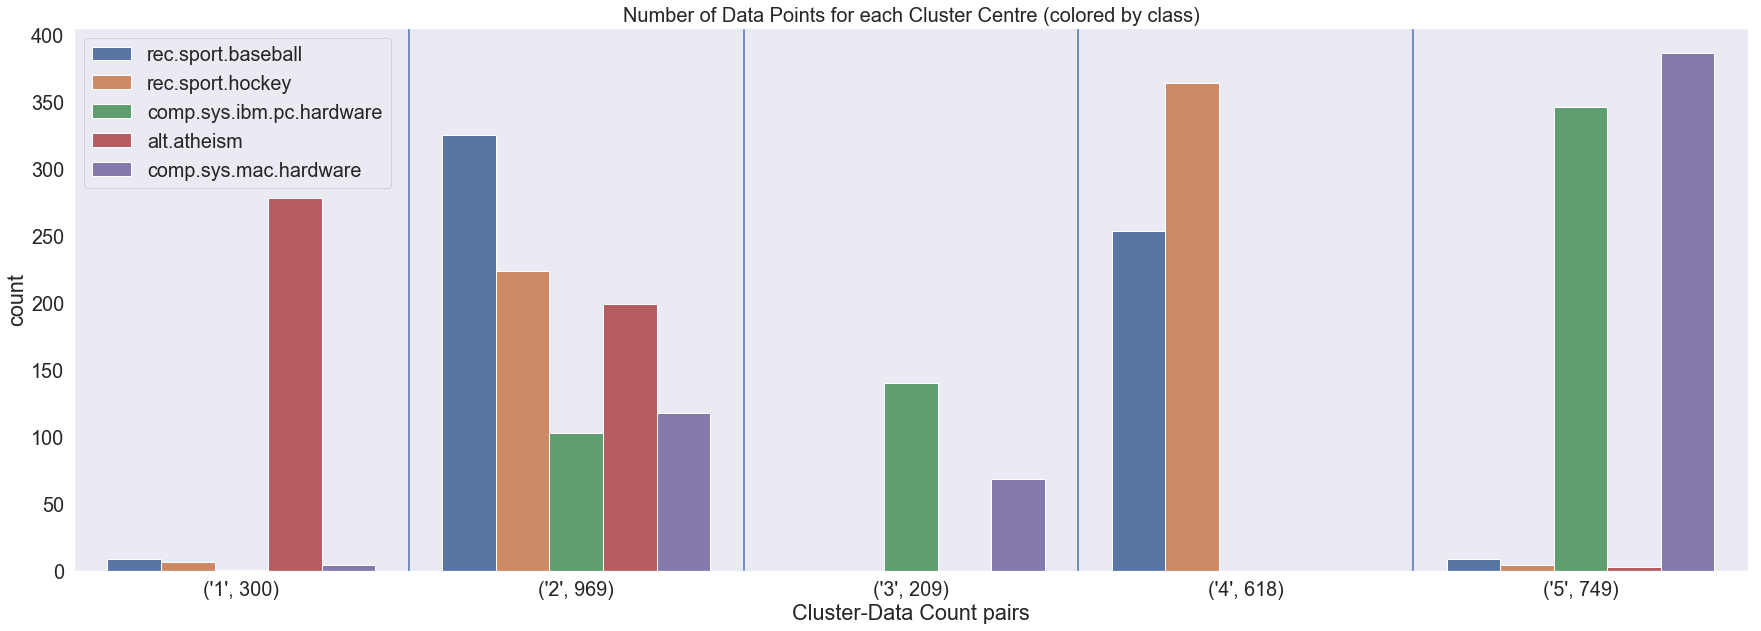

In [16]:
#(e) # Your Code goes here:
pca_2=PCA(n_components = 2,random_state=1000)
pca_2.fit(X)
X_pca_2 = pca_2.transform(X)
kmeans_2 = KMeans(n_clusters=5, random_state=1000)  
kmeans_2.fit(X_pca_2)

plt.rcParams['figure.figsize']= (30,10)
sns.set(style='dark',font_scale=1.8)
ax=sns.countplot(x=kmeans_2.labels_,hue=y) #plot counts for each cluster, separated by (hue) the true class labels (y) 
plt.title('Number of Data Points for each Cluster Centre (colored by class)',fontsize=20)
counts_2=pd.value_counts(kmeans_2.labels_) #populate the data counts for each cluster
counts_2_sorted=counts_2.sort_index() #sort the counts by increasing cluster index
label_counts_2=zip(['1','2','3','4','5'],counts_2_sorted)#include data counts with each cluster label
ax.set(xticklabels=label_counts_2,xlabel='Cluster-Data Count pairs')#set the labels of x-axis as the cluster-data count pairs


#used manually drawn vertical lines instead of gridlines as they were stronger to separate the clusters in the plot.
plt.axvline(x=0.5)
plt.axvline(x=1.5)
plt.axvline(x=2.5)
plt.axvline(x=3.5)

print()

<div align="right"><font color="blue" size="4">4.0</font></div>

(f) ***Your answer goes here:***
<br> We don't see **any improvement** in the fit of the data and we can observe that the distribution among classes has remained **the same** as in [Q 2.3.a](#question_2_3) (similar classes' pairs appear together in **high counts** with **zero/near zero** counts for other classes in those clusters). <br>Cluster 2 keeps containing a mix of all the classes and the distribution of counts is still not good (large difference between counts). The only difference is that some clusters have **"shifted"**, for example it seems like the old Clusters 1 and 5 have *switched*

<div align="right"><font color="blue" size="4">2.0</font></div>

### ========== Question 2.6 --- [16 marks] ==========

Another benefit of Dimensionality Reduction is that it allows us to visualise the data. That is, while we cannot visualise a 1000-feature space, we can pick the top two components and visualise those. We will do this by means of a [Voronoi Diagram](https://en.wikipedia.org/wiki/Voronoi_diagram), which we will use to analyse the cluster centres.

&nbsp;&nbsp;**(a)** [Text] By explaining what a Voronoi Diagram is, indicate why it is useful in visualising the extent (in space) of K-Means clusters?<br>
&nbsp;&nbsp;**(b)** [Code] Using the function `plot_voronoi` which we provided in the `utils` package, visualise the clusters in the two-dimensional PCA space (top two components). Mark each cluster centre, and visualise **some** (*Hint: sub-sample*) of the data points to give you an idea of where the true classes lie. Make sure that the key elements of the plot are clearly visible/discernible (you may need to tweak some parameters) and label clearly all necessary elements of the plot (color-coding, data points). *Tip: you may need to change y to a numeric value if using matplotlib rather than seaborn*.<br>
&nbsp;&nbsp;**(c)** [Text] What can you conclude from the plot as to the `classification-performance` of the K-Means classifier?

<div align="right"><font color="blue" size="4">10.0/16.0</font></div>

(a) ***Your answer goes here:***
A Voronoi diagram is a particular split of a plane in *n-dimensional* space which defines *voronoi cells(regions)*. For *each* voronoi cell(usually distinguished by different color), a subgroup of datapoints from a dataset  is allocated to that cell/region, when the *distance(in that dimension)* of the subgroup (datapoints) is *the closest* to *that region* (closer than *all* other cells/regions.
<br> **Use for K-means:** Voronoi diagrams are perfect to apply for K-means visualisation, as it can indicate the `clusters` (voronoi cells with allocated datapoints) , `cluster centres` (the central point of each region) *and* `decision boundaries` (the *boundary lines* between voronoi cells/regions, *all in **one** plot/diagram*. This helps to assess how well our K-means algorithm has clustered the datapoints of different classes in the clusters(voronoi cells) and how well distributed those data is among clusters.

<div align="right"><font color="blue" size="4">2.0</font></div>

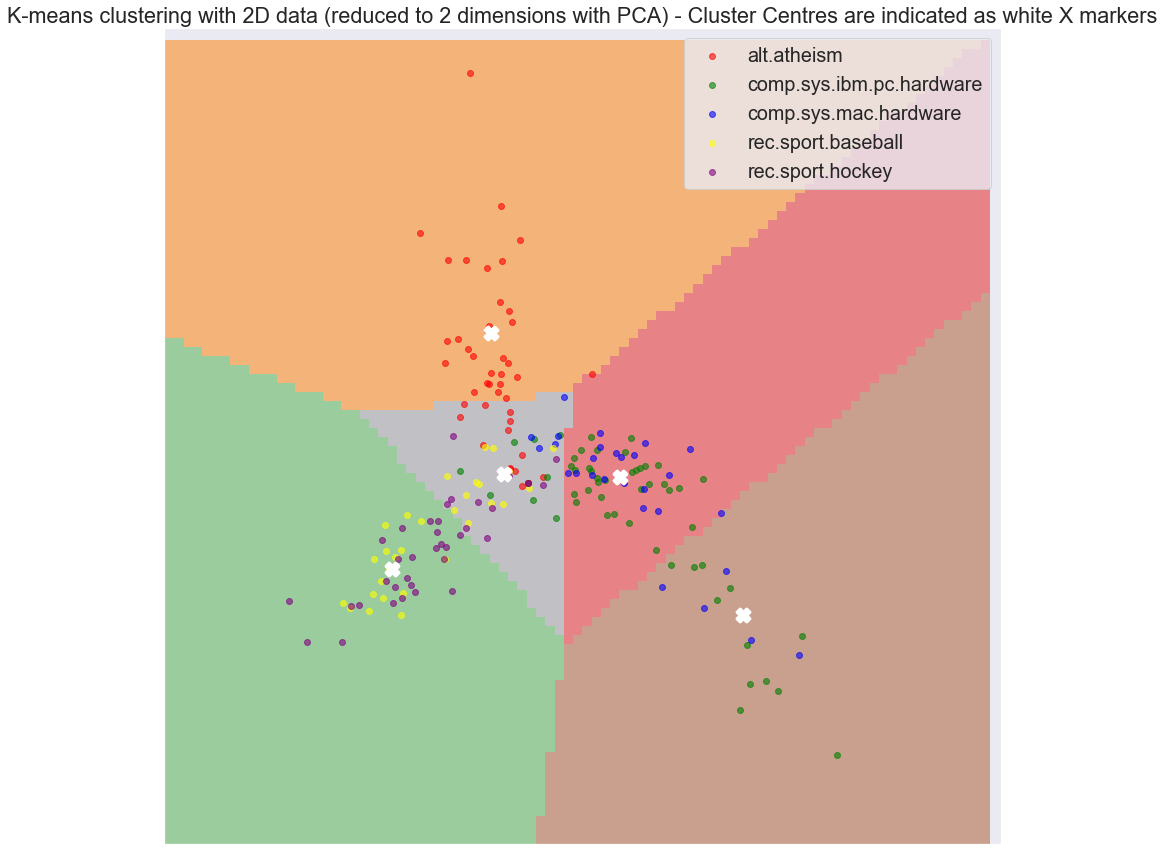

In [61]:
# used some code from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html
#used kmeans_2 and X_pca_2 object from the previous cell
#we want to plot the decision boundaries. 
X_min, X_max = X_pca_2[:, 0].min() - .05, X_pca_2[:, 0].max() + .05
Y_min, Y_max = X_pca_2[:, 1].min() - .05, X_pca_2[:, 1].max() + .05


h = 0.001     # step size of the meshgrid range of values for [x_min, x_max] * [y_min, y_max]. Lower gives better quality
xx, yy = np.meshgrid(np.arange(X_min, X_max, h), np.arange(Y_min, Y_max, h))
range=[X_min, X_max, Y_min, Y_max]#we set the range of values in an array

#taking a sample from the datapoints so as to not have as many datapoints on the voronoi diagram
#NOTE: We are ONLY taking a sample from the datapoints for the plot, the kmeans object is fitted on the FULL transformed data
# and the CLUSTER CENTRES are based on the whole transformed data.
X_sample=X_pca_2[:200,:] #take the first 200 documents as a sub-sample to not have too many datapoints on our voronoi diagram
y_sample=y[:200]#similarly take the first 200 truelabels as a sub-sample

plt.figure(figsize=(15,15))
#plot a voronoi diagram using the utils method taking a range of -0.5 to 0.5 for x and y.
plot_voronoi(kmeans,[-0.5,0.5,-0.5,0.5])

#We will assign one color to each decision region
colors = ['red', 'green', 'blue', 'yellow', 'purple' ]
classes = np.unique(y) # populate the class labels used for the legent

for color, label in zip(colors, classes):
    #plot a scatter plot (the datapoints as markers) from the SAMPLE, for each class with a different color
    plt.scatter(X_sample[y_sample == label, 0], X_sample[y_sample == label, 1], color=color, alpha=.6, label=label)


#populate the cluster centres
cluster_centers=kmeans_2.cluster_centers_
#plot the cluster centres as X markers of white color 
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1],marker='X', s=169, linewidths=3,color='white', zorder=10)

plt.title('K-means clustering with 2D data (reduced to 2 dimensions with PCA) - Cluster Centres are indicated as white X markers')
plt.xlim(X_min, Y_max) #setting the limits of the x-axis
plt.ylim(X_min, Y_max) #setting the limits of the y-axis
plt.xticks(())
plt.yticks(())
plt.legend(scatterpoints=1) #providing a legend to distinguish between each class's marker colors for datapoints 
plt.show()

<div align="right"><font color="blue" size="4">5.0</font></div>

(c) ***Your answer goes here:***
<br>We can deduce the same conclusions about the performance of our K-means istance by looking at this visualisation (*voronoi diagram*). The k-means `classification performance` is **not** good, which was anticipated from the low ARI score even for the PCA reduced data.
<br> That is, kmeans classifies data from classes that are *somewhat unique* **well**, for example `alt.atheism` is classified well in the *orange* region(red markers), but *similar classes* are not classified correctly (data points are *misclassified* from one class to its *similar* class often).<br>The examples of the *similar classes* here are {`rec.sport.baseball`(*yellow markers* and `rec.sport.hockey` (*purple markers*)} which we can see data points being classified from the grey to the green region and vice versa *and*
{`comp.sys.ibm.pc.hardware`(*green* markers) and `comp.sys.mac.hardware` (*blue markers*)} similarly from the brown to the red region and vice versa.
<br> Finally, we have the *grey* region/cluster which again contains data from *all* classes, which is very bad.

<br> Kmeans is obviously affected from the mean, so the fact that we had **potential outliers** when we inspected the data is a bad factor that might have affected the performance. Also the tf-idf entries were always *positive*, which might or might not be a good input for the Kmeans algorithm (those terms which contributed negatively to the fit might have been better with a negative entry in the data)

<div align="right"><font color="blue" size="4">3.0</font></div>